In [1]:
from mpasanalysis import *
%matplotlib inline

In [2]:
save_fig = True

In [3]:
dataroot = '/projects/ClimateEnergy_3/azamatm/E3SM_simulations/theta.20180906.branch_noCNT.A_WCYCL1950S_CMIP6_HR.ne120_oRRS18v3_ICG'
figroot = '/home/qingli/work/e3sm_res_cmp/figures'
rst_file = dataroot+'/run/mpaso.rst.0051-01-01_00000.nc'
mon_file = dataroot+'/run/mpaso.hist.am.timeSeriesStatsMonthly.0051-01-01.nc'

In [4]:
f_rst = Dataset(rst_file, 'r')
f_mon = Dataset(mon_file, 'r')

In [5]:
lon = f_rst.variables['lonCell'][:]*180.0/np.pi
lat = f_rst.variables['latCell'][:]*180.0/np.pi
cellArea = f_rst.variables['areaCell'][:]
temp = f_rst.variables['temperatureSurfaceValue'][0,:]
mld = f_mon.variables['timeMonthly_avg_dThreshMLD'][0,:]
mld2 = f_mon.variables['timeMonthly_avg_tThreshMLD'][0,:]


In [6]:
mpaso_obj = MPASOMap(data=temp, lat=lat, lon=lon, cellarea=cellArea, name='SST', units='degC')

Minimum and maximum markersizes: 0.63 and 2.33
Plotting map of mld (m) at region 'LabSea'


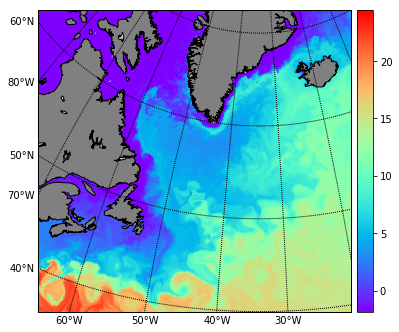

In [7]:
fig = plt.figure()
fig.set_size_inches(6, 6)
mpaso_obj.plot(region='LabSea')
if save_fig:
    figname = figroot+'/LabSea_temp.png'
    plt.savefig(figname, dpi = 300)

Minimum and maximum markersizes: 8.20 and 15.74
Plotting map of mld (m) at region 'test'


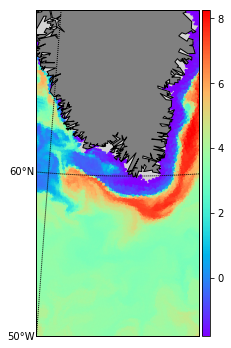

In [8]:
fig = plt.figure()
fig.set_size_inches(6, 6)
mpaso_obj.plot(region='test')
if save_fig:
    figname = figroot+'/test_temp.png'
    plt.savefig(figname, dpi = 300)

In [9]:
# fig = plt.figure()
# fig.set_size_inches(6, 6)
# mpaso_obj.plot()

### Surface heat flux (W m$^{-2}$)

In [10]:
# read data
shf = f_mon.variables['timeMonthly_avg_sensibleHeatFlux'][0,:]
lhf = f_mon.variables['timeMonthly_avg_latentHeatFlux'][0,:]
swf = f_mon.variables['timeMonthly_avg_shortWaveHeatFlux'][0,:]
lwfu = f_mon.variables['timeMonthly_avg_longWaveHeatFluxUp'][0,:]
lwfd = f_mon.variables['timeMonthly_avg_longWaveHeatFluxDown'][0,:]
lwf = lwfu+lwfd
mpaso_swf = MPASOMap(data=swf, lat=lat, lon=lon, cellarea=cellArea, name='SWF', units=r'W m^{-2}')
mpaso_lwf = MPASOMap(data=lwf, lat=lat, lon=lon, cellarea=cellArea, name='LWF', units=r'W m^{-2}')
mpaso_shf = MPASOMap(data=shf, lat=lat, lon=lon, cellarea=cellArea, name='SHF', units=r'W m^{-2}')
mpaso_lhf = MPASOMap(data=lhf, lat=lat, lon=lon, cellarea=cellArea, name='LHF', units=r'W m^{-2}')


Minimum and maximum markersizes: 0.63 and 2.33
Plotting map of SWF (W m^{-2}) at region 'LabSea'
Minimum and maximum markersizes: 0.63 and 2.33
Plotting map of LWF (W m^{-2}) at region 'LabSea'
Minimum and maximum markersizes: 0.63 and 2.33
Plotting map of SHF (W m^{-2}) at region 'LabSea'
Minimum and maximum markersizes: 0.63 and 2.33
Plotting map of LHF (W m^{-2}) at region 'LabSea'


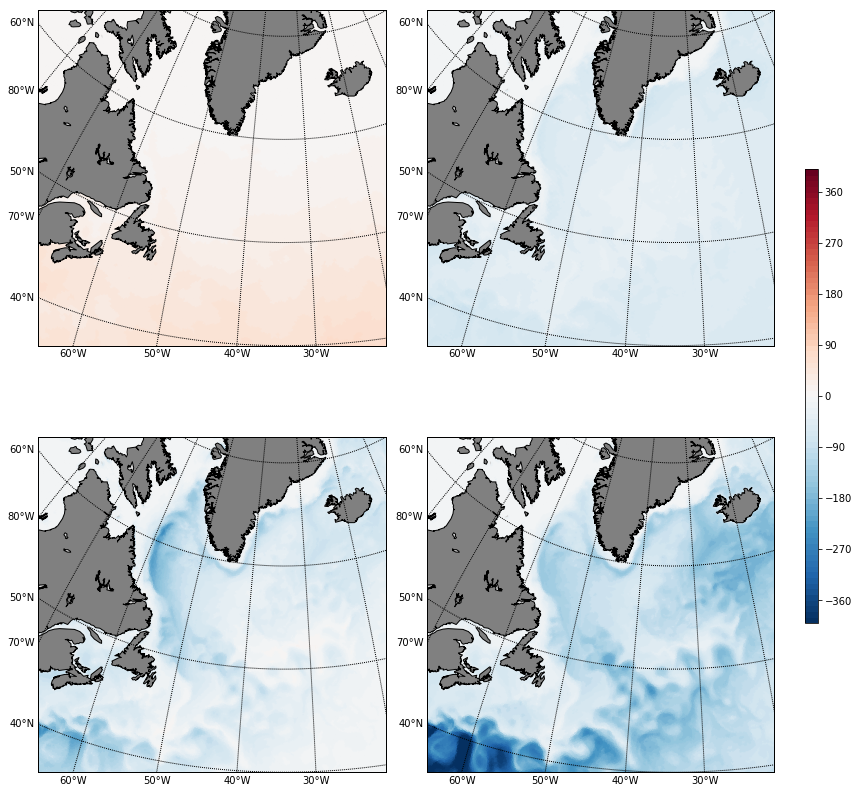

In [16]:
# plot figure
f, axarr = plt.subplots(2,2)
f.set_size_inches(12, 11)
levels = np.linspace(-400, 400, 81)
im0 = mpaso_swf.plot(region='LabSea', axis=axarr[0,0], levels=levels, cmap='RdBu_r', add_colorbar=False)
im1 = mpaso_lwf.plot(region='LabSea', axis=axarr[0,1], levels=levels, cmap='RdBu_r', add_colorbar=False)
im2 = mpaso_shf.plot(region='LabSea', axis=axarr[1,0], levels=levels, cmap='RdBu_r', add_colorbar=False)
im3 = mpaso_lhf.plot(region='LabSea', axis=axarr[1,1], levels=levels, cmap='RdBu_r', add_colorbar=False)
plt.tight_layout()
# colorbar
plt.subplots_adjust(right=0.9)
cax0 = plt.axes([0.85, 0.15, 0.1, 0.7])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0, aspect=35)
cb0.formatter.set_powerlimits((-3, 3)) 
cb0.update_ticks()

In [13]:
levels = np.linspace(-400, 400, 81)
print(levels)

[-400. -390. -380. -370. -360. -350. -340. -330. -320. -310. -300. -290.
 -280. -270. -260. -250. -240. -230. -220. -210. -200. -190. -180. -170.
 -160. -150. -140. -130. -120. -110. -100.  -90.  -80.  -70.  -60.  -50.
  -40.  -30.  -20.  -10.    0.   10.   20.   30.   40.   50.   60.   70.
   80.   90.  100.  110.  120.  130.  140.  150.  160.  170.  180.  190.
  200.  210.  220.  230.  240.  250.  260.  270.  280.  290.  300.  310.
  320.  330.  340.  350.  360.  370.  380.  390.  400.]
